<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Qn-1-(exclude-5-points)" data-toc-modified-id="Qn-1-(exclude-5-points)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Qn 1 (exclude 5 points)</a></span></li><li><span><a href="#Qn2-all-data-points" data-toc-modified-id="Qn2-all-data-points-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Qn2 all data points</a></span></li><li><span><a href="#Qn3-quadratic-fit-excluding-4-rows" data-toc-modified-id="Qn3-quadratic-fit-excluding-4-rows-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Qn3 quadratic fit excluding 4 rows</a></span></li></ul></div>

In [2]:
# Load a dataset with first 5 rows as outliers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
%matplotlib inline

In [3]:
!cat data_allerr.dat

# index & x & y & sigm_y & sigma_x & corr 
1 & 201 & 592 & 61 & 9 & -0.84
2 & 244 & 401 & 25 & 4 & 0.31
3 & 47 & 583 & 38 & 11 & 0.64
4 & 287 & 402 & 15 & 7 & -0.27
5 & 203 & 495 & 21 & 5 & -0.33
6 & 58 & 173 & 15 & 9 & 0.67
7 & 210 & 479 & 27 & 4 & -0.02
8 & 202 & 504 & 14 & 4 & -0.05
9 & 198 & 510 & 30 & 11 & -0.84
10 & 158 & 416 & 16 & 7 & -0.69
11 & 165 & 393 & 14 & 5 & 0.30
12 & 201 & 442 & 25 & 5 & -0.46
13 & 157 & 317 & 52 & 5 & -0.03
14 & 131 & 311 & 16 & 6 & 0.50
15 & 166 & 400 & 34 & 6 & 0.73
16 & 160 & 337 & 31 & 5 & -0.52
17 & 186 & 423 & 42 & 9 & 0.90
18 & 125 & 334 & 26 & 8 & 0.40
19 & 218 & 533 & 16 & 6 & -0.78
20 & 146 & 344 & 22 & 5 & -0.56


In [4]:
# load data
df = pd.read_csv('data_allerr.dat',sep='&')
df.columns = [i.strip('#').strip() for i in df.columns]
print(df.shape)
df.head(10)

(20, 6)


,index,x,y,sigm_y,sigma_x,corr
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33
5,6,58,173,15,9,0.67
6,7,210,479,27,4,-0.02
7,8,202,504,14,4,-0.05
8,9,198,510,30,11,-0.84
9,10,158,416,16,7,-0.69


In [5]:
# exclude 4 points.
df1 = df.iloc[4:,:]
df1.head()

,index,x,y,sigm_y,sigma_x,corr
4,5,203,495,21,5,-0.33
5,6,58,173,15,9,0.67
6,7,210,479,27,4,-0.02
7,8,202,504,14,4,-0.05
8,9,198,510,30,11,-0.84


In [6]:
df2 = df

# Qn 1 (exclude 5 points)

In [7]:
def plot_regression(x,y,yerr,degree):
    """
    np.polyfit(x,y,degree) gives params of form ax + b
    
    a = slope, b= intercept
    """
    slope, intercept = np.polyfit(x, y, degree)
    yhat = [slope * i + intercept for i in x]

    # Plot the best fit line over the actual values
    plt.plot(x, y,'o')
    label = 'y = {:.2f} x + {:.2f}'.format(slope,intercept)
    plt.plot(x, yhat, 'b',label=label)
    plt.errorbar(x, y, yerr=yerr, fmt='.k')

    plt.title('Regression degree {}'.format(degree))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(fontsize=20)
    plt.show()

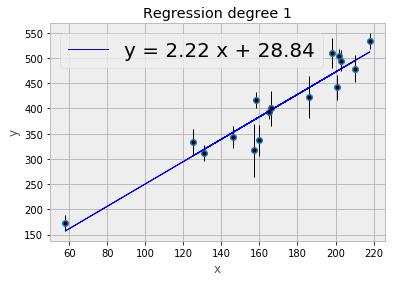

In [8]:
x = df1['x'].values
y = df1['y'].values
yerr = df1['sigm_y'].values
plot_regression(x,y,yerr,1)

# Qn2 all data points

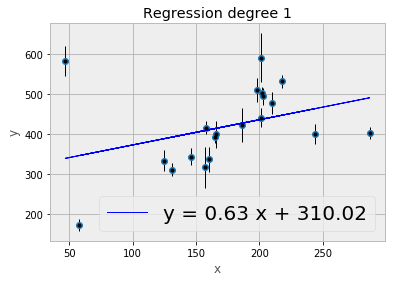

In [9]:
x = df2['x'].values
y = df2['y'].values
yerr = df2['sigm_y'].values
plot_regression(x,y,yerr,1)

# Qn3 quadratic fit excluding 4 rows

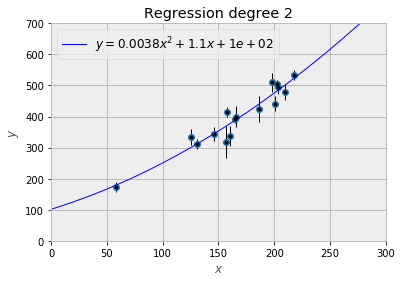

In [37]:
def plot_polynomial_regression(df1,degree):
    x = df1['x'].values
    y = df1['y'].values
    yerr = df1['sigm_y'].values
    params = np.polyfit(x, y, degree)

    # polynomial fit
    poly = np.poly1d(params)

    # plot data
    plt.gca()
    plt.plot(x, y,'o')

    # label for the bestfit
    pat = [ ('{:.2g}x^' + str(i) +' + ') for i in reversed(range(len(params)))]
    pat = ''.join(pat)
    pat = r'$y = ' + pat.rstrip('x^0 + ').replace('x^1','x') + r'$'
    label = pat.format(*params)

    # bestfit plot
    xx = np.linspace(0, 300, 1001)
    yy = np.zeros(len(xx))
    for e,i in enumerate(reversed(range(len(params)))):
        yy += params[e] * xx**i

    plt.plot(xx, yy, 'b-',label=label)

    # plot error
    plt.errorbar(x, y, yerr=yerr, fmt='.k')

    # titles
    plt.title('Regression degree {}'.format(degree))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(fontsize=12)
    plt.xlim(0,300)
    plt.ylim(0,700)
    plt.show()
    
plot_polynomial_regression(df1,2)